# Introduction 

The plant Growth dataset. 


In [80]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import zscore
from scipy.stats import anderson
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels import robust
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import normaltest
from scipy.stats import median_test
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd




In [81]:
df = pd.read_csv('PlantGrowth.csv')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


This dataset compares plant dried weight from a plant growth experiment subjected under control, treatment1, and treatment2 conditions. It contains 30 instances on three columns, which are rownames, weight, and group.

In [83]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

In [84]:
df.isnull()

,rownames,weight,group
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [85]:
df.drop(columns=['rownames'], inplace=True)

# describe dataset
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The dataset plantgrowth.csv is a complete dataset. 'Count' shows that column weight contains 30 non-null (non-missing) values in 30 rows.

Mean or average value is calculated by totaling the sum of all values and dividing it by the count, which pinpoints the general central location within the dataset. However, outliers can distort the mean, thus misrepresenting the average of the data. The mean for weight is 5.073.

In [86]:
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


# Breakdown of data set 

 weight

A numeric variable representing the weight of plants after a certain period of growth. and has a Continuous numerical variable. the values  represents the biomass or size of plant samples.

group

A categorical variable representing different experimental conditions. There are three categories here
1. ctrl: The control group, which doesn’t receive any special treatment.
2. trt1: The first treatment group.
3. trt2: The second treatment group.

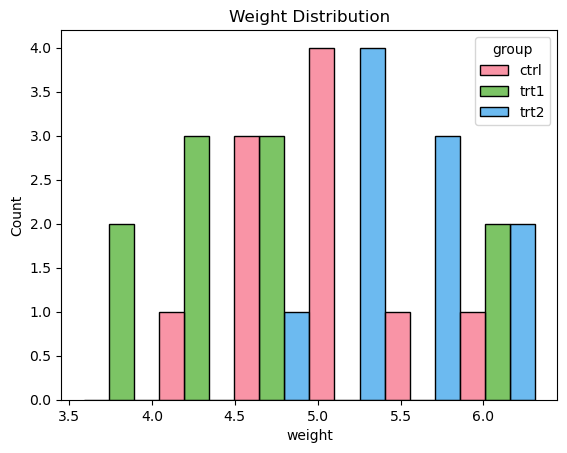

In [87]:
sns.histplot(data=df, x=df['weight'], hue='group', multiple="dodge", palette='husl').set_title('Weight Distribution')
plt.show()

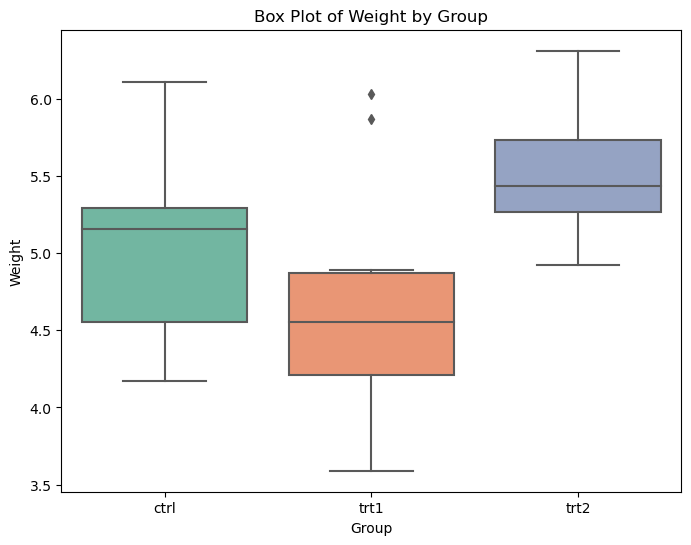

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df, palette='Set2')
plt.title("Box Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

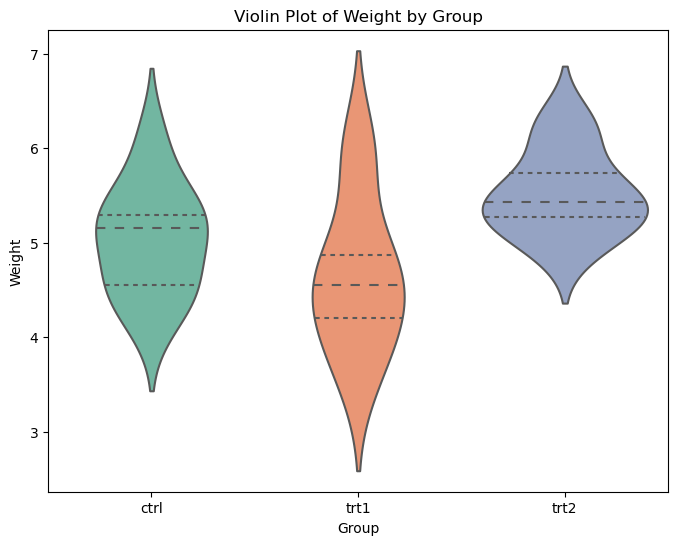

In [89]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='weight', data=df, palette='Set2', inner="quartile")
plt.title("Violin Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

C:\Users\keith\AppData\Local\Temp\ipykernel_14572\4075154964.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='group', y='weight', data=df, palette='husl')


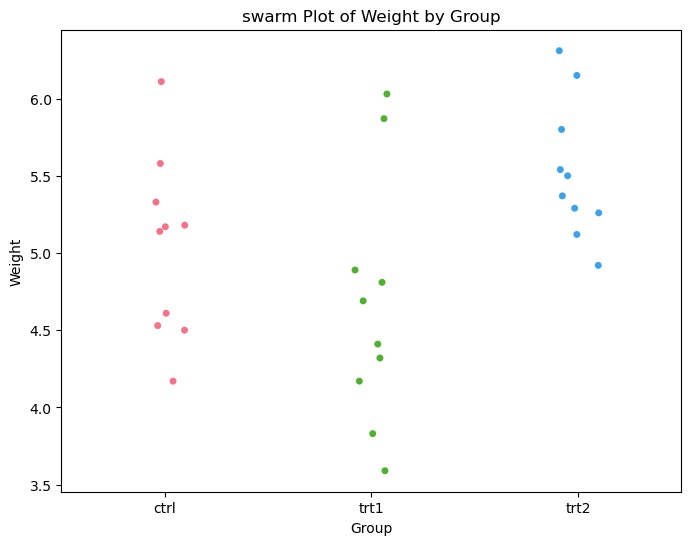

In [90]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='group', y='weight', data=df, palette='husl')
plt.title("swarm Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

<Figure size 1000x600 with 0 Axes>

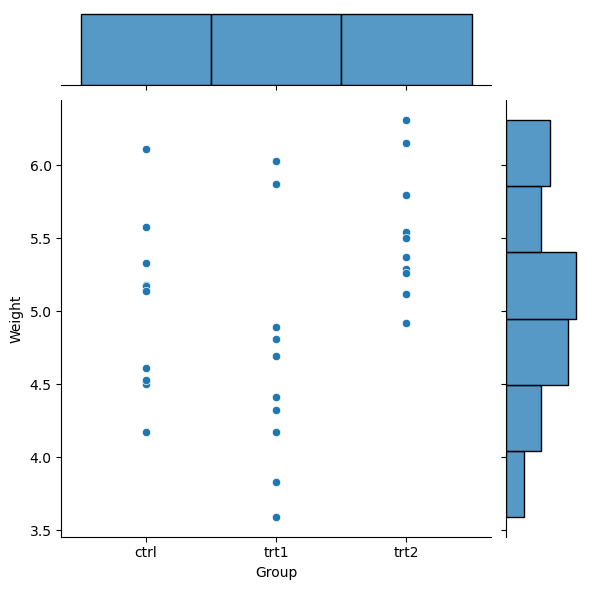

In [91]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='group', y='weight', data=df, palette='husl')
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

<Axes: xlabel='group', ylabel='weight'>

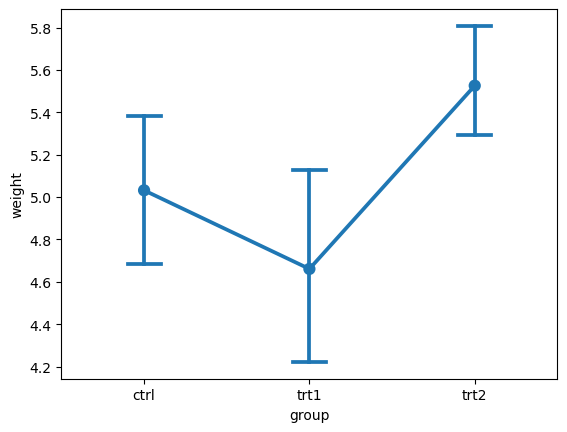

In [92]:
sns.pointplot(data=df, x="group", y="weight", capsize=.2)


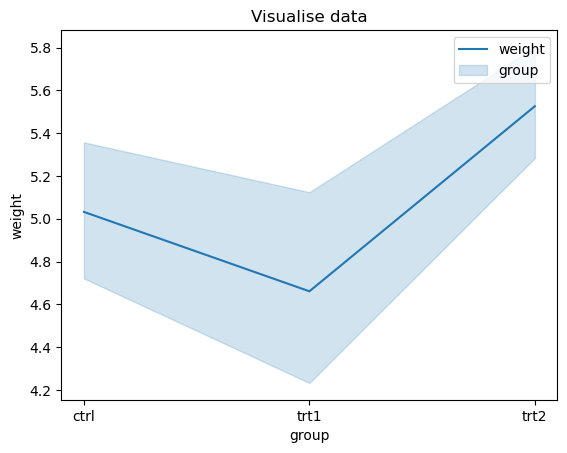

In [93]:
sns.lineplot(data=df, x = 'group', y = 'weight')
#abc
plt.title('Visualise data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

In [94]:
ctrl_weight = df[df['group'] == 'ctrl']['weight']
trt1_weight = df[df['group'] == 'trt1']['weight']
trt2_weight = df[df['group'] == 'trt2']['weight']

# treating outliers 

As we can see from the above plots there are seems to be outliers in trt1 so going to run some tests to confirm this and remove these from out dataset.  

In [95]:
def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr 
    upper_bound = q3 + 1.5 * iqr 
    return data[(data < lower_bound) | (data > upper_bound)]

print("Outliers based on IQR:")

for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    outliers = find_outliers_iqr(group_data)
    print(f"{group} group outliers:\n{outliers.values}\n")

# 2. Using Z-Score for Outlier Detection


print("Outliers based on Z-Score:")

for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    z_scores = zscore(group_data)
    outliers = group_data[np.abs(z_scores) > 3]
    print(f"{group} group outliers:\n{outliers.values}\n")
    

Outliers based on IQR:
ctrl group outliers:
[]

trt1 group outliers:
[5.87 6.03]

trt2 group outliers:
[]

Outliers based on Z-Score:
ctrl group outliers:
[]

trt1 group outliers:
[]

trt2 group outliers:
[]



In [96]:

outliers_to_remove = [5.87, 6.03]

# Filter out these specific outliers in the 'trt1' group
df_cleaned = df[~((df['group'] == 'trt1') & (df['weight'].isin(outliers_to_remove)))]

# Verify the result
print("Updated dataset after removing outliers from trt1 group:")
print(df_cleaned['group'].value_counts())

Updated dataset after removing outliers from trt1 group:
group
ctrl    10
trt2    10
trt1     8
Name: count, dtype: int64


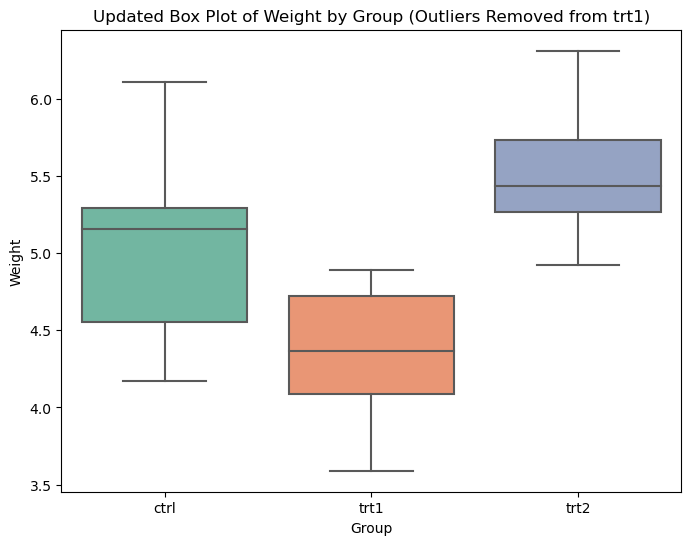

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df_cleaned, palette='Set2')
plt.title("Updated Box Plot of Weight by Group (Outliers Removed from trt1)")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

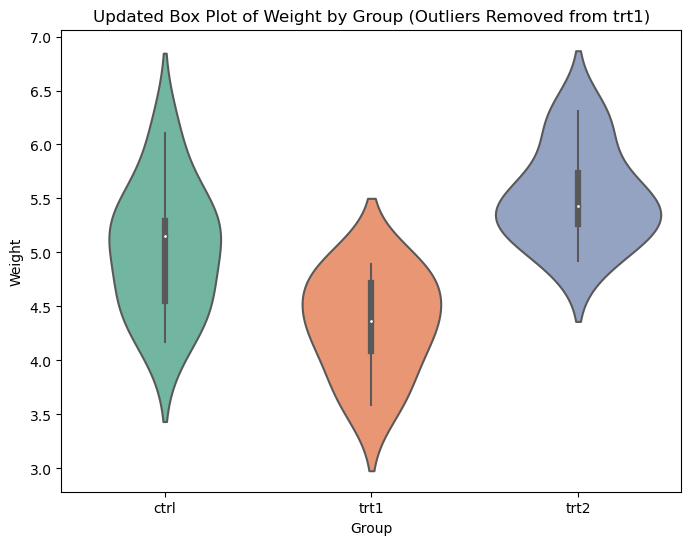

In [98]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='weight', data=df_cleaned, palette='Set2')
plt.title("Updated Box Plot of Weight by Group (Outliers Removed from trt1)")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

# part two 

# testing distubution 

In [99]:
# Perform Shapiro-Wilk test for normality on each group
print("Shapiro-Wilk Test for Normality:")

# Control group
stat, p_value = shapiro(ctrl_weight)
print(f"Control Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Control group follows a normal distribution.\n")
else:
    print("Control group does not follow a normal distribution.\n")

# Treatment 1 group
stat, p_value = shapiro(trt1_weight)
print(f"Treatment 1 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 1 group follows a normal distribution.\n")
else:
    print("Treatment 1 group does not follow a normal distribution.\n")

# Treatment 2 group
stat, p_value = shapiro(trt2_weight)
print(f"Treatment 2 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 2 group follows a normal distribution.\n")
else:
    print("Treatment 2 group does not follow a normal distribution.\n")

Shapiro-Wilk Test for Normality:
Control Group: Shapiro-Wilk Statistic = 0.9567, p-value = 0.7475
Control group follows a normal distribution.

Treatment 1 Group: Shapiro-Wilk Statistic = 0.9304, p-value = 0.4519
Treatment 1 group follows a normal distribution.

Treatment 2 Group: Shapiro-Wilk Statistic = 0.9410, p-value = 0.5643
Treatment 2 group follows a normal distribution.



In [100]:
result_ctrl = stats.anderson(ctrl_weight, dist="norm")
print("Anderson-Darling Test for Control Group:")
print(f"AD Statistic: {result_ctrl.statistic:.4f}")
for i, critical_value in enumerate(result_ctrl.critical_values):
    significance_level = result_ctrl.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_ctrl.statistic > result_ctrl.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

# Anderson-Darling Test for Treatment 1 Group
result_trt1 = stats.anderson(trt1_weight, dist='norm')
print("Anderson-Darling Test for Treatment 1 Group:")
print(f"AD Statistic: {result_trt1.statistic:.4f}")
for i, critical_value in enumerate(result_trt1.critical_values):
    significance_level = result_trt1.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_trt1.statistic > result_trt1.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

# Anderson-Darling Test for Treatment 2 Group
result_trt2 = stats.anderson(trt2_weight, dist='norm')
print("Anderson-Darling Test for Treatment 2 Group:")
print(f"AD Statistic: {result_trt2.statistic:.4f}")
for i, critical_value in enumerate(result_trt2.critical_values):
    significance_level = result_trt2.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_trt2.statistic > result_trt2.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

Anderson-Darling Test for Control Group:
AD Statistic: 0.2829
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.

Anderson-Darling Test for Treatment 1 Group:
AD Statistic: 0.3298
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.

Anderson-Darling Test for Treatment 2 Group:
AD Statistic: 0.3089
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.



In [101]:
# Perform KS tests between each pair of groups
print("Kolmogorov-Smirnov Test Results:")
stat, p_value = ks_2samp(ctrl_weight, trt1_weight)
print(f"Control vs Treatment 1: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
     print("No significant difference in distribution between Control and Treatment 1.\n")
else:
    print("Significant difference in distribution between Control and Treatment 1.\n")

# Control vs Treatment 2
stat, p_value = ks_2samp(ctrl_weight, trt2_weight)
print(f"Control vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Control and Treatment 2.\n")
else:
    print("Significant difference in distribution between Control and Treatment 2.\n")

# Treatment 1 vs Treatment 2
stat, p_value = ks_2samp(trt1_weight, trt2_weight)
print(f"Treatment 1 vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Treatment 1 and Treatment 2.\n")
else:
    print("Significant difference in distribution between Treatment 1 and Treatment 2.\n")

Kolmogorov-Smirnov Test Results:
Control vs Treatment 1: KS Statistic = 0.4000, p-value = 0.4175
No significant difference in distribution between Control and Treatment 1.

Control vs Treatment 2: KS Statistic = 0.5000, p-value = 0.1678
No significant difference in distribution between Control and Treatment 2.

Treatment 1 vs Treatment 2: KS Statistic = 0.8000, p-value = 0.0021
Significant difference in distribution between Treatment 1 and Treatment 2.



running the above test have shown there is a normal diturbuion on our dataset. to wrap up this section I am going to create some plots to help show this. 

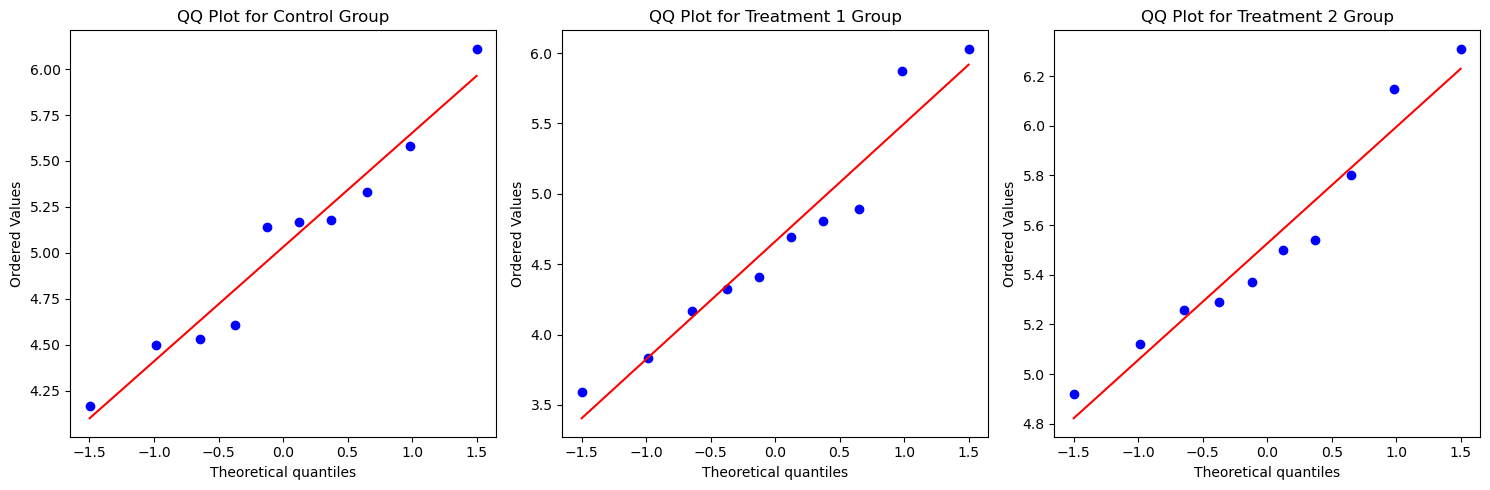

In [102]:
plt.figure(figsize=(15, 5))

# QQ plot for Control group
plt.subplot(1, 3, 1)
stats.probplot(df[df['group'] == 'ctrl']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Control Group")

# QQ plot for Treatment 1 group
plt.subplot(1, 3, 2)
stats.probplot(df[df['group'] == 'trt1']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Treatment 1 Group")

# QQ plot for Treatment 2 group
plt.subplot(1, 3, 3)
stats.probplot(df[df['group'] == 'trt2']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Treatment 2 Group")

plt.tight_layout()
plt.show()

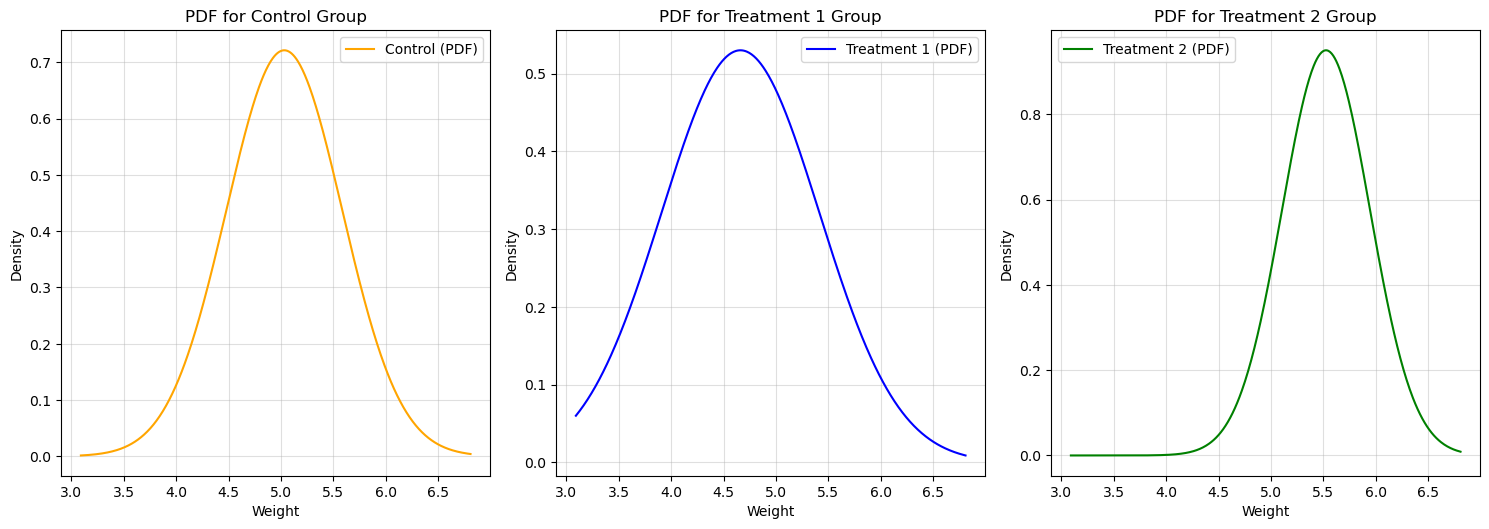

In [120]:
# Calculate PDFs for Control, Treatment 1, and Treatment 2 groups assuming normal distributions

# Define range for PDF calculation
x_range = np.linspace(
    min(np.min(ctrl_weight), np.min(trt1_weight), np.min(trt2_weight)) - 0.5,
    max(np.max(ctrl_weight), np.max(trt1_weight), np.max(trt2_weight)) + 0.5,
    500
)

# Compute PDFs for each group
mean_ctrl, std_ctrl = np.mean(ctrl_weight), np.std(ctrl_weight, ddof=0)
pdf_ctrl = (1 / (std_ctrl * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_ctrl) / std_ctrl) ** 2)

mean_trt1, std_trt1 = np.mean(trt1_weight), np.std(trt1_weight, ddof=0)
pdf_trt1 = (1 / (std_trt1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_trt1) / std_trt1) ** 2)

mean_trt2, std_trt2 = np.mean(trt2_weight), np.std(trt2_weight, ddof=0)
pdf_trt2 = (1 / (std_trt2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_trt2) / std_trt2) ** 2)

# Plot the PDFs
plt.figure(figsize=(15, 10))

# PDF plot for Control group
plt.subplot(2, 3, 1)
plt.plot(x_range, pdf_ctrl, label='Control (PDF)', color='orange')
plt.title("PDF for Control Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

# PDF plot for Treatment 1 group
plt.subplot(2, 3, 2)
plt.plot(x_range, pdf_trt1, label='Treatment 1 (PDF)', color='blue')
plt.title("PDF for Treatment 1 Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

# PDF plot for Treatment 2 group
plt.subplot(2, 3, 3)
plt.plot(x_range, pdf_trt2, label='Treatment 2 (PDF)', color='green')
plt.title("PDF for Treatment 2 Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:


# Mood's Median test across all three groups
stat, p_value, _, _ = median_test(ctrl_weight, trt1_weight, trt2_weight)
print(f"Mood's Median Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in medians among the groups.")
else:
    print("No significant difference in medians among the groups.")

Mood's Median Test Statistic = 7.2000, p-value = 0.0273
There is a significant difference in medians among the groups.


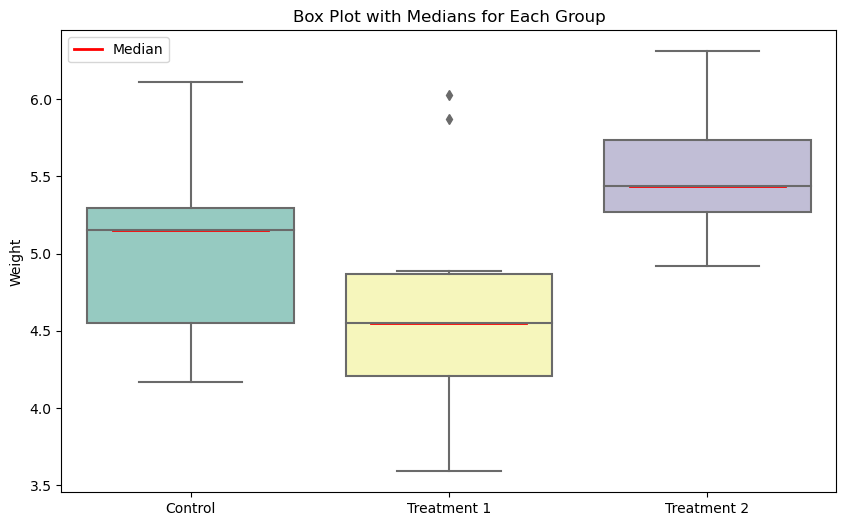

In [ ]:


# Combining data and labels for plotting
data = [ctrl_weight, trt1_weight, trt2_weight]
labels = ['Control', 'Treatment 1', 'Treatment 2']

# Plot boxplot with median emphasis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set3")
plt.xticks([0, 1, 2], labels)
plt.title("Box Plot with Medians for Each Group")
plt.ylabel("Weight")

# Adding median lines
for i, group in enumerate(data):
    plt.plot([i - 0.3, i + 0.3], [np.median(group)] * 2, color="red", linewidth=2, label="Median" if i == 0 else "")

plt.legend()
plt.show()


In [ ]:


# Calculating MAD for each group
mad_control = robust.mad(ctrl_weight)
mad_trt1 = robust.mad(trt1_weight)
mad_trt2 = robust.mad(trt2_weight)

print(f"Median Absolute Deviation (MAD):")
print(f"Control: {mad_control:.4f}")
print(f"Treatment 1: {mad_trt1:.4f}")
print(f"Treatment 2: {mad_trt2:.4f}")


Median Absolute Deviation (MAD):
Control: 0.7191
Treatment 1: 0.5337
Treatment 2: 0.3632


In [ ]:
# Calculate skewness and kurtosis
skew_ctrl = stats.skew(ctrl_weight)
kurt_ctrl = stats.kurtosis(ctrl_weight)

skew_trt1 = stats.skew(trt1_weight)
kurt_trt1 = stats.kurtosis(trt1_weight)

skew_trt2 = stats.skew(trt2_weight)
kurt_trt2 = stats.kurtosis(trt2_weight)

print("Skewness and Kurtosis:")
print(f"Control - Skewness: {skew_ctrl:.4f}, Kurtosis: {kurt_ctrl:.4f}")
print(f"Treatment 1 - Skewness: {skew_trt1:.4f}, Kurtosis: {kurt_trt1:.4f}")
print(f"Treatment 2 - Skewness: {skew_trt2:.4f}, Kurtosis: {kurt_trt2:.4f}")


Skewness and Kurtosis:
Control - Skewness: 0.2707, Kurtosis: -0.6751
Treatment 1 - Skewness: 0.5557, Kurtosis: -0.6602
Treatment 2 - Skewness: 0.5677, Kurtosis: -0.7288


# part three 



# T tests 

In this project one of the areas we will be looking at is t tests. A t test is a method used to find the difference in the means between two groups and how these groups are related. for example if we wanted to look at the number of smoker and non smokers in a givng group we could use a t test to compare these. The outcome of these tests is known as the T value.

t-Test, also known as the Student’s t-test, is a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown. t-tests are used to compare sample populations and infer conclusions about the larger population. For tests involving the mean of a sample of size greater than 30 the normal distribution is usually applied.

An employee in the Guinness brewery, first published in 1908 in the scientific journal Biometrika using the pseudonym "Student". Gosset found that existing statistical techniques using large samples were not useful for the small sample sizes that he encountered in his work. 




# Assumptions for t test 

1. The scale of measurements applied to a t test follows a continuous or ordinal scale. These follow numeric values, and the scale can be divided meaningfully into smaller increments, such as fractional and decimal values. For example, weight, height, and temperature are continuous. in are dataset we can see that the weight variable in the dataset is confirmed as a continuous variable.

2. Sample size The second assumption is that the sample size for both groups are of considerable size. A Student's t-test is appropriate to use when the sample size is around 30,Sample size is important because the data has to be normally distributed, which is difficult to achieve with a small sample size. Another concern is that poor data representation by small sample sizes tend to produce less precise estimates. The standard error is also increased, which makes it harder to detect a true difference between groups (Type I and II errors), eventually leading to a reduced power of test. Standard error decreases as sample size increases. 

3. The data, when plotted, results in a normal distribution, bell-shaped distribution curve. This is a crucial assumption because if the samples are not normally distributed then it isn’t valid to use the p-values from the test to draw conclusions about the differences between the samples. If the sample sizes are small (n < 50), then we can use a Shapiro-Wilk test to determine if each sample size is normally distributed. If the p-value of the test is less than a certain significance level, then the data is likely not normally distributed. if greater than this we can use a qq plot. 

4. The data is collected from a representative, randomly selected portion of the total population.

5. Homogeneity of variance is important because the standard error in the denominator of the t-statistic formula relies on an assumption of equal variances. In pooled variance, when sample sizes are equal, each group contributes equally to the pooled variance, preventing one group's variance from disproportionately affecting the estimate. The group with the larger sample size will create imbalance by dominating the pooled variance estimate. you can use levenes test which was developed by and named after American statistician and geneticist Howard Levene to test for this. 

In [ ]:

# Levene's test for equal variances
stat, p_value = levene(ctrl_weight, trt1_weight, trt2_weight)
print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in variances among groups (p < 0.05). Variances are not equal.")
else:
    print("No significant difference in variances among groups (p >= 0.05). Variances are likely equal.")


Levene's Test for Homogeneity of Variances:
Statistic = 1.1192, p-value = 0.3412
No significant difference in variances among groups (p >= 0.05). Variances are likely equal.



Types of t tests 
One Sample t-test 

Two Sample t-test

In [ ]:


# Example: Independent t-test between Control and Treatment 1
stat, p_value = ttest_ind(trt1_weight, trt2_weight, equal_var=True)
print(f"t-test Statistic = {stat:.4f}, p-value = {p_value:.4f}")  

if p_value > 0.05:
	print('Accept null hypothesis that the means are equal')
else:
	print('Reject the null hypothesis that the means are equal.')

t-test Statistic = -3.0101, p-value = 0.0075
Reject the null hypothesis that the means are equal.


# cohans d test 



Cohen's d measures the effect size, providing insight into the practical significance of the difference between the two groups, even when the statistical test (like the t-test) shows no significant result.  P-values depend heavily on sample size. With large samples, even small effects can be statistically significant. Conversely, with small samples, meaningful differences might not reach significance. Effect sizes like Cohen's d remain interpretable regardless of sample size.
In real-world applications, knowing the magnitude of the difference helps determine if the observed effect is meaningful in context, even if it's not statistically significant.

In [ ]:
# Calculate Cohen's d to measure the effect size

# Means and standard deviations of the two groups
mean_trt1 = np.mean(trt1_weight)
mean_trt2 = np.mean(trt2_weight)
std_trt1 = np.std(trt1_weight, ddof=1)  # Sample standard deviation
std_trt2 = np.std(trt2_weight, ddof=1)

# Pooled standard deviation
n_trt1 = len(trt1_weight)
n_trt2 = len(trt2_weight)
pooled_std = np.sqrt(((n_trt1 - 1) * std_trt1**2 + (n_trt2 - 1) * std_trt2**2) / (n_trt1 + n_trt2 - 2))

# Cohen's d
cohens_d = (mean_trt1 - mean_trt2) / pooled_std
cohens_d


-1.3461569918326173

A Cohen's d value of −1.34 would indicate a large effect size but in the opposite direction, meaning that the mean of trt1 is significantly lower than that of trt2

# z test 

This can be used as an alternitive to a t test, as is used mostly for larger sample size when n is greater than > 30, With large samples, the sampling distribution of the mean approximates a normal distribution due to the Central Limit Theorem. Requires the population standard deviation to be known. and it also Assumes that the sample comes from a population with a known variance.

In [ ]:
mean_trt1 = np.mean(trt1_weight)
mean_trt2 = np.mean(trt2_weight)

std_trt1 = np.std(trt1_weight, ddof=0)  # Assuming population std approx by sample std
std_trt2 = np.std(trt2_weight, ddof=0)  # Assuming population std approx by sample std

n_trt1 = len(trt1_weight)
n_trt2 = len(trt2_weight)

# Z-test for two means
z_stat = (mean_trt1 - mean_trt2) / np.sqrt((std_trt1**2 / n_trt1) + (std_trt2**2 / n_trt2))
z_stat

-3.172922458221758

# anova

ANOVA Results:
       Statistic  p-Value
ANOVA   4.846088  0.01591

Tukey's HSD Post Hoc Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
    Control Treatment 1   -0.371 0.3909 -1.0622 0.3202  False
    Control Treatment 2    0.494  0.198 -0.1972 1.1852  False
Treatment 1 Treatment 2    0.865  0.012  0.1738 1.5562   True
-------------------------------------------------------------


<Figure size 1200x600 with 0 Axes>

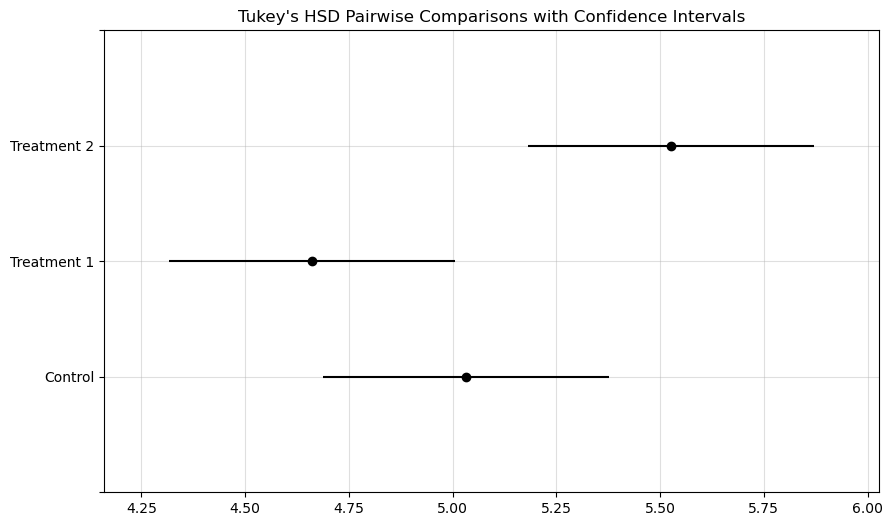

In [ ]:
# Perform ANOVA directly using trt1_weight, trt2_weight, and ctrl_weight as variables
anova_stat, anova_p_value = f_oneway(ctrl_weight, trt1_weight, trt2_weight)

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(
    np.concatenate([ctrl_weight, trt1_weight, trt2_weight]),
    ['Control'] * len(ctrl_weight) + ['Treatment 1'] * len(trt1_weight) + ['Treatment 2'] * len(trt2_weight),
    alpha=0.05
)

# Display ANOVA results
anova_results = {
    "Statistic": [anova_stat],
    "p-Value": [anova_p_value]
}
anova_results_df = pd.DataFrame(anova_results, index=["ANOVA"])

# Output results and Tukey HSD test summary
print("ANOVA Results:")
print(anova_results_df)

print("\nTukey's HSD Post Hoc Results:")
print(tukey_results.summary())

# Visualization of Tukey HSD results
plt.figure(figsize=(12, 6))
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Pairwise Comparisons with Confidence Intervals")
plt.grid(alpha=0.4)
plt.show()



# end of notebook 